In [1]:
####1.订单表的长度
####2.统计菜名的平均价格
####3.什么菜最受欢迎
####4.哪个订单ID点的菜最多

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif']=['Simhei']#设置中文显示
%matplotlib inline
#1.加载数据
data1 = pd.read_excel('D:/桌面/资料/餐厅数据分析/meal_order_detail.xlsx',sheet_name = 'meal_order_detail1')
data2 = pd.read_excel('D:/桌面/资料/餐厅数据分析/meal_order_detail.xlsx',sheet_name = 'meal_order_detail2')
data3 = pd.read_excel('D:/桌面/资料/餐厅数据分析/meal_order_detail.xlsx',sheet_name = 'meal_order_detail3')

#2.数据预处理（NA处理,合并数据），分析数据
data = pd.concat([data1,data2,data3],axis = 0)#axis = 0代表行连接拼接数据
#data.head()

data.dropna(axis = 1,inplace = True)#按列删除，修改原数据
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 3610
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   detail_id         10037 non-null  int64         
 1   order_id          10037 non-null  int64         
 2   dishes_id         10037 non-null  int64         
 3   dishes_name       10037 non-null  object        
 4   itemis_add        10037 non-null  int64         
 5   counts            10037 non-null  int64         
 6   amounts           10037 non-null  int64         
 7   place_order_time  10037 non-null  datetime64[ns]
 8   add_inprice       10037 non-null  int64         
 9   picture_file      10037 non-null  object        
 10  emp_id            10037 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(2)
memory usage: 941.0+ KB


In [3]:
#统计卖出菜品的平均价格
#round(data['amounts'].mean(),2)#方法一:pandas自带函数
round(np.mean(data['amounts']),2)#方法二：numpy函数处理

44.82

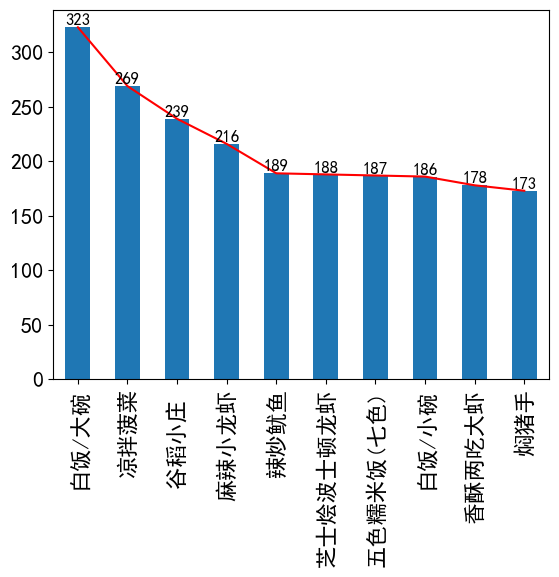

In [4]:
#频数统计：什么菜最受欢迎（对菜名进行频数统计，取最大的前十名）
dishes_count = data['dishes_name'].value_counts()[:10]

#3.数据可视化matplotlib
dishes_count.plot(kind = 'line',color=['r'])
dishes_count.plot(kind = 'bar',fontsize=16)

for x,y in enumerate(dishes_count):
    plt.text(x,y+2,y,ha='center',fontsize=12)

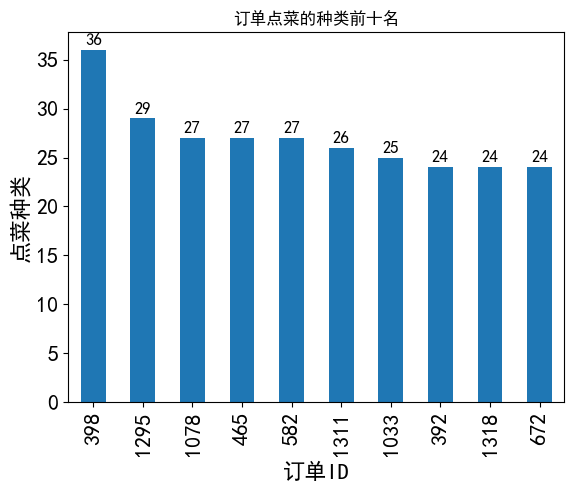

In [5]:
#点菜的种类最多的订单
data_group=data['order_id'].value_counts()[:10]
data_group.plot(kind ='bar',fontsize=16)
plt.title('订单点菜的种类前十名')
plt.xlabel('订单ID',fontsize=16)
plt.ylabel('点菜种类',fontsize=16)

for x,y in enumerate(data_group):
    plt.text(x,y+0.5,y,ha='center',fontsize = 12)
    
#八月份餐厅订单点菜种类前十名，平均点菜25个菜品

Text(0.5, 1.0, '订单ID点菜数量前十名')

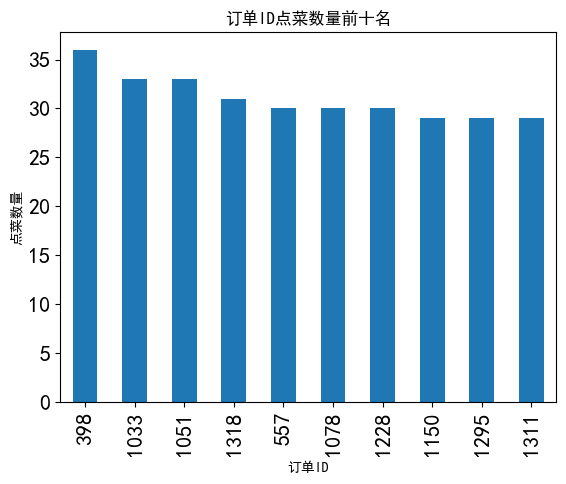

In [6]:
#订单ID点菜数量最多
data['total_amounts']=data['counts']*data['amounts']#统计单道菜的消费总额
dataGroup=data[['order_id','counts','amounts','total_amounts']].groupby(by='order_id')
Group_sum = dataGroup.sum() #对分组中的列求和

sort_counts = Group_sum.sort_values(by='counts',ascending = False)
#根据counts降序排序
sort_counts['counts'][:10].plot(kind ='bar',fontsize=16)
plt.xlabel('订单ID')
plt.ylabel('点菜数量')
plt.title('订单ID点菜数量前十名')
#八月份订单点菜数量前十名

Text(0.5, 1.0, '消费金额前十名')

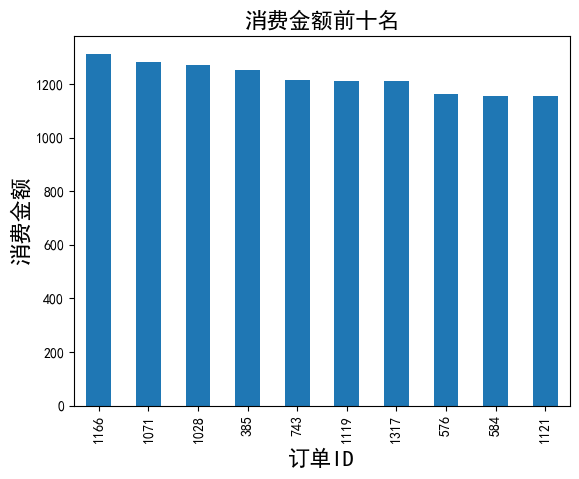

In [7]:
#订单ID消费额前十名
sort_total_amounts=Group_sum.sort_values(by='total_amounts',ascending=False)
sort_total_amounts['total_amounts'][:10].plot(kind='bar')
plt.xlabel('订单ID',fontsize=16)
plt.ylabel('消费金额',fontsize=16)
plt.title('消费金额前十名',fontsize=16)


Text(0.5, 1.0, '消费单价前十名')

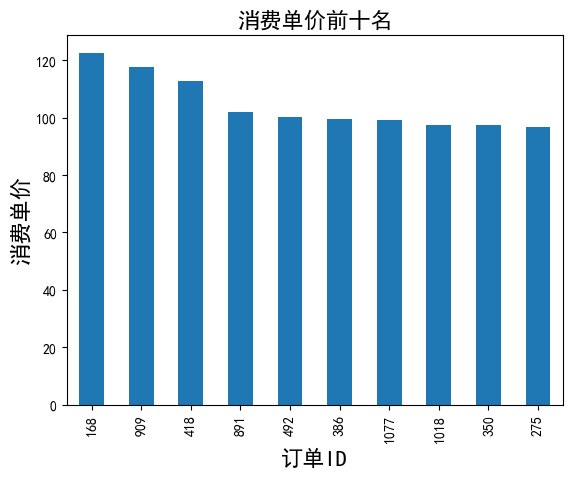

In [8]:
#平均消费单价最贵的订单前十名

Group_sum['average']=Group_sum['total_amounts']/Group_sum['counts']
sort_average=Group_sum.sort_values(by='average',ascending=False)

sort_average['average'][:10].plot(kind='bar')
plt.xlabel('订单ID',fontsize=16)
plt.ylabel('消费单价',fontsize=16)
plt.title('消费单价前十名',fontsize=16)

Text(0.5, 1.0, '下单数与小时的关系图')

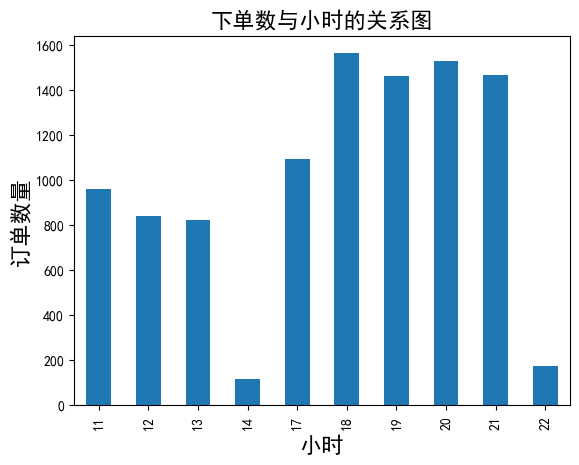

In [12]:
#一天当中什么时间段点菜量比较集中（hour）
data['hourcount'] = 1#新列：用作计数器，记录小时
data['time']=pd.to_datetime(data['place_order_time'])#将时间转换成日期类型存储
data['hour'] = data['time'].map(lambda x:x.hour)
gp_by_hour=data.groupby(by='hour').count()['hourcount']
gp_by_hour.plot(kind='bar')
plt.xlabel('小时',fontsize=16)
plt.ylabel('点菜数量',fontsize=16)
plt.title('点菜数与小时的关系图',fontsize=16)

Text(0.5, 1.0, '点菜数与小时的关系图')

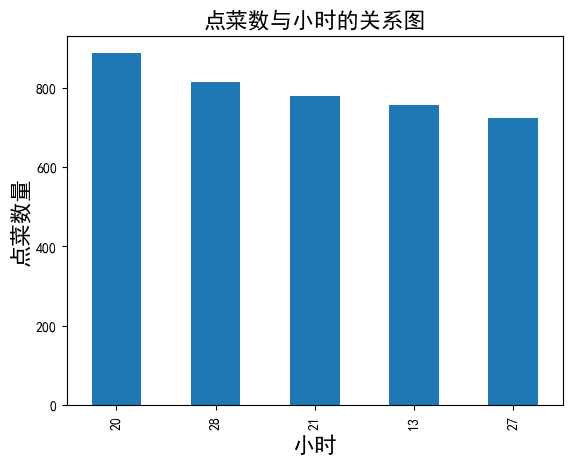

In [17]:
#哪一天点菜数目最多
data['daycount']=1
data['day'] = data['time'].map(lambda x:x.day)#解析出天
gp_by_day = data.groupby(by='day').count()['daycount']
gp_by_day.plot(kind='bar')
plt.xlabel('日期号数',fontsize=16)
plt.ylabel('点菜数量',fontsize=16)
plt.title('点菜数与日期号数的关系图',fontsize=16)

#排序：选出点菜量最大的前五天
gp_by_day_max=gp_by_day.sort_values(ascending=False).head(5)
gp_by_day_max.plot(kind='bar')
plt.xlabel('日期号数',fontsize=16)
plt.ylabel('点菜数量',fontsize=16)
plt.title('点菜数与日期号数的关系图',fontsize=16)

Text(0.5, 1.0, '点菜数与星期的关系图')

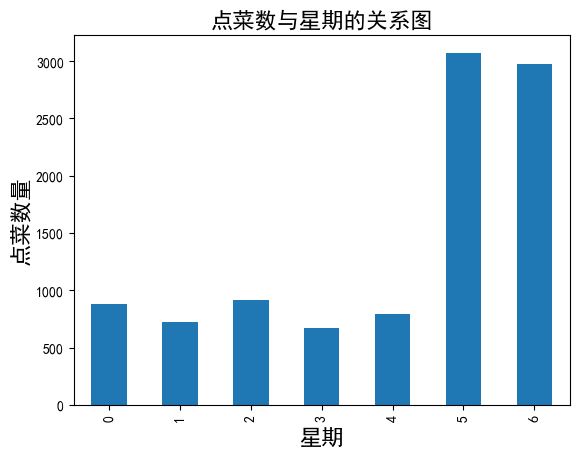

In [22]:
#查看星期几人数最多，点餐数最多，映射数据到星期
data['weekcount']=1
data['weekday']=data['time'].map(lambda x:x.weekday())
gp_by_weekday=data.groupby(by='weekday').count()['weekcount']
gp_by_weekday.plot(kind='bar')   
plt.xlabel('星期',fontsize=16)
plt.ylabel('点菜数量',fontsize=16)
plt.title('点菜数与星期的关系图',fontsize=16)